# NETFLIX ANALYSIS

In [151]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel(r"C:\Users\HP\Downloads\NetflixData.xlsx")

In [60]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  Who are the top 5 directors with the highest number of movies directed?

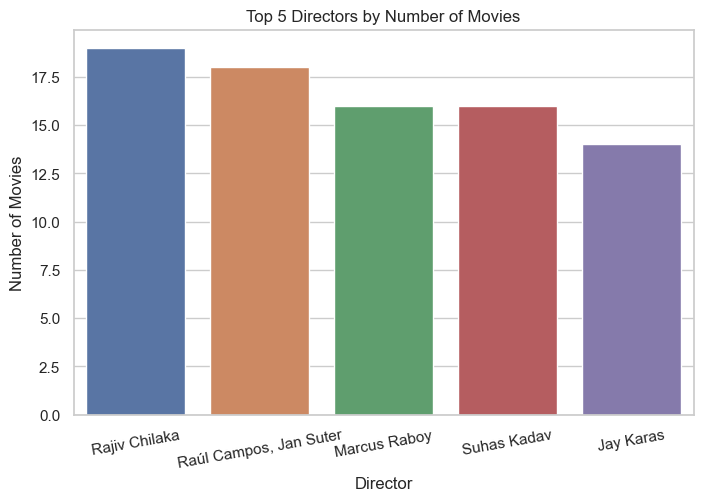

In [157]:
director_counts = data['director'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x= director_counts.index, y=director_counts.values)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 5 Directors by Number of Movies')
plt.xticks(rotation=10)  
plt.show()


# how many movies and tv shows are in dataset?

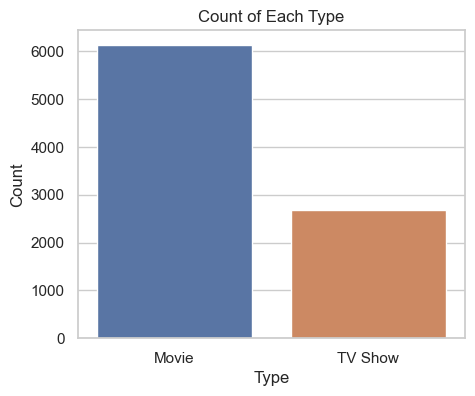

In [32]:
type_counts =data.groupby("type").type.count()
plt.figure(figsize=(5, 4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Each Type')
plt.show()



# Which country produces the most content in the dataset?

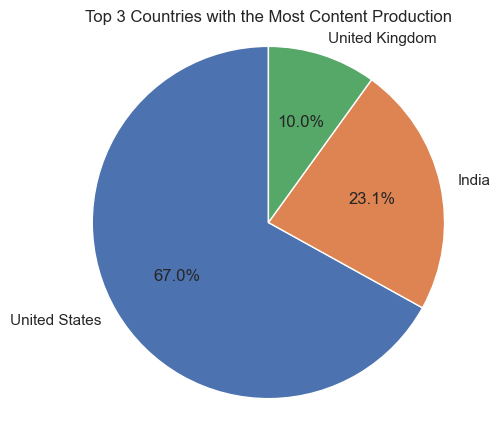

In [48]:
country_counts = data['country'].value_counts()
# Take the top 3 countries with the most content production
top_countries = country_counts.head(3)
# Create a pie chart (circle)
plt.figure(figsize=(5, 5))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Countries with the Most Content Production')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# What is the distribution of content ratings in the nexflix and which rating is the most common?

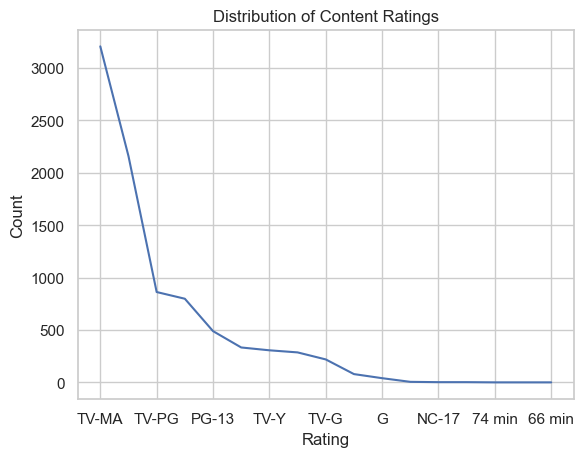

'TV-MA'

In [62]:
# Calculate the count of each content rating
rating_counts = data['rating'].value_counts()

rating_counts.plot()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Content Ratings')
plt.show()

# Find the most common rating
most_common_rating = rating_counts.idxmax()
most_common_rating


# What is the oldest content (movie or TV show) in the dataset, and when was it released?


In [65]:
# Find the oldest content by sorting by release year
oldest_content = data[data['release_year'] == data['release_year'].min()]

# Display the oldest content and its release date
oldest_content[['title', 'type', 'release_year']]


,title,type,release_year
4250,Pioneers: First Women Filmmakers*,TV Show,1925


# how many numbers of movies and TV shows released each year ?

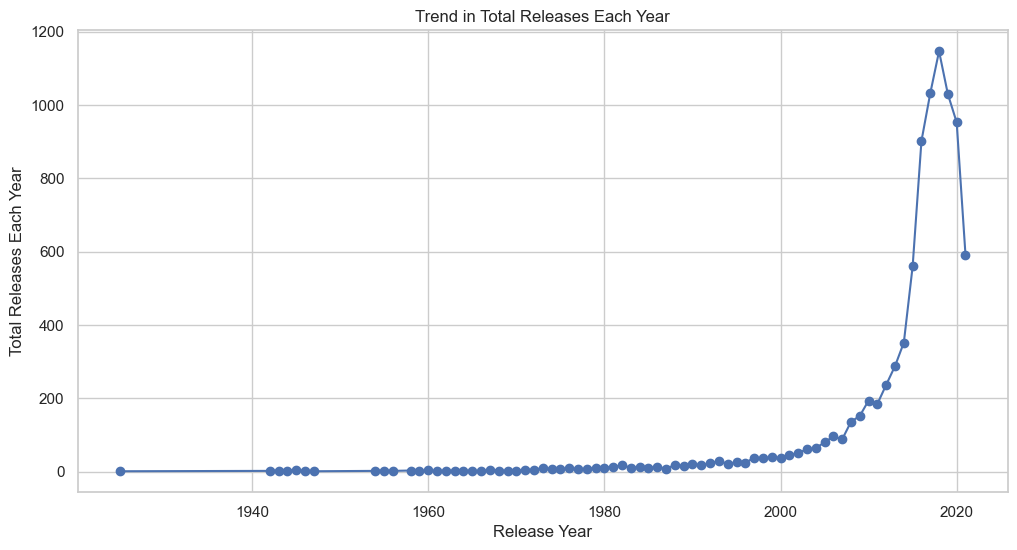

In [171]:
import matplotlib.pyplot as plt

# Group the dataset by release year and type, and count the number of each type
yearly_counts = data.groupby(['release_year', 'type'])['type'].count().unstack().fillna(0)

# Calculate the total number of releases (movies + TV shows) each year
yearly_totals = yearly_counts.sum(axis=1)

# Create a line graph to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Total Releases Each Year')
plt.title('Trend in Total Releases Each Year')
plt.grid(True)
plt.show()


# How many movies and TV shows were released each year, and how has it changed over the years?

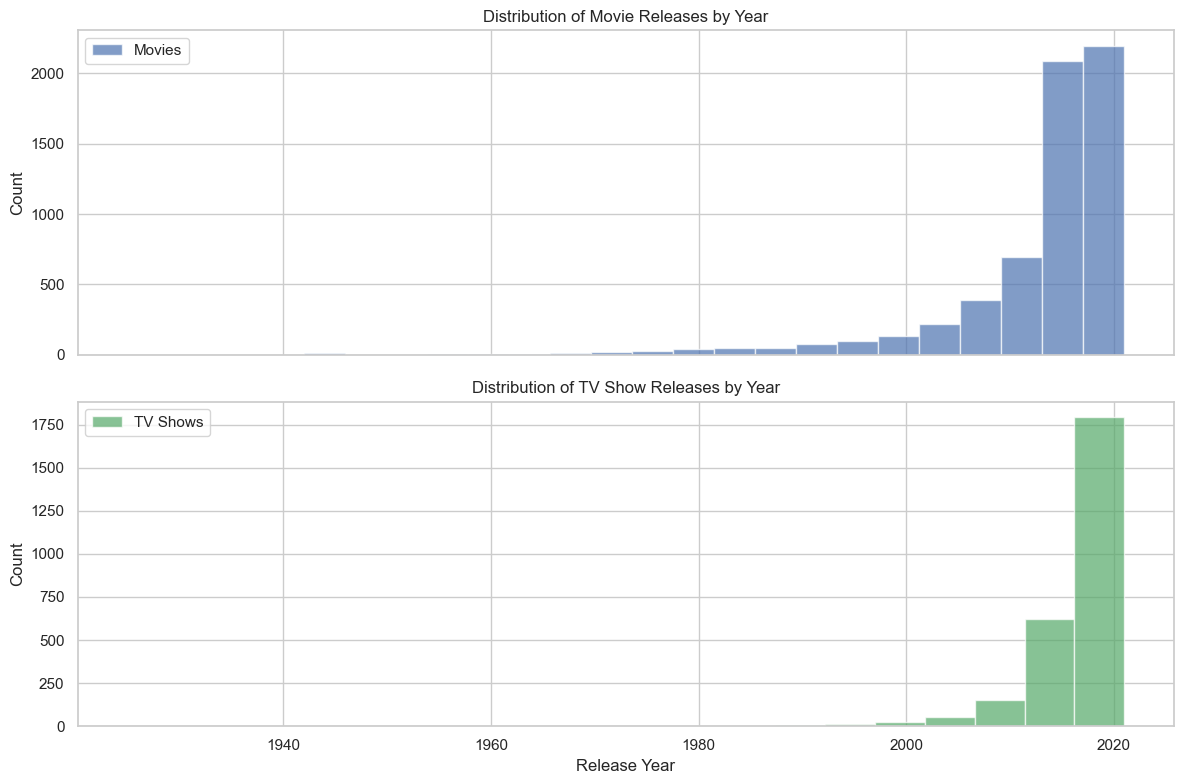

In [114]:
import matplotlib.pyplot as plt

# Filter the dataset for movies and TV shows separately
movies_df = data[data['type'] == 'Movie']
tv_shows_df =data[data['type'] == 'TV Show']

# Set up subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Create histograms for movie releases
axes[0].hist(movies_df['release_year'], bins=20, color='b', alpha=0.7, label='Movies')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Movie Releases by Year')

# Create histograms for TV show releases
axes[1].hist(tv_shows_df['release_year'], bins=20, color='g', alpha=0.7, label='TV Shows')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of TV Show Releases by Year')

# Add legends
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()


# what are the  top 3 most common release years?

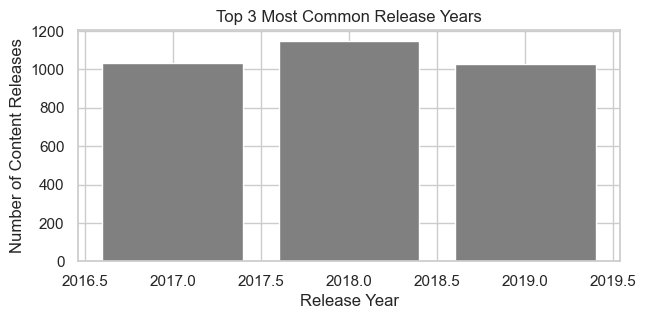

In [131]:
# Calculate the count of content for each release year
release_year_counts = data['release_year'].value_counts()

# Get the top 3 most common release years
top_3_common_release_years = release_year_counts.head(3)

# Create a bar chart
plt.figure(figsize=(7,3))
plt.bar(top_3_common_release_years.index, top_3_common_release_years.values, color='grey')
plt.xlabel('Release Year')
plt.ylabel('Number of Content Releases')
plt.title('Top 3 Most Common Release Years')
plt.show()
